In [13]:
import numpy as np
import PIL.Image as img
import PIL.ImageSequence as ims

def import_image_stack(image_stack_file_name):
    
    image_stack = img.open(image_stack_file_name)
    
    image_arrays = []
    
    for image in ims.Iterator(image_stack):
        
        image_array = num.asarray(image)
        
        image_arrays.append(image_array)
    
    return np.array(image_arrays)

In [2]:
import os
import h5py

In [5]:
source_folder = '/Users/ricardo/Documents/Temporary/Segmentations/Segmentations/'
file_paths = sorted([source_folder + file for file in os.listdir(source_folder) if (file.endswith('.h5')) and (not 'RNAi' in file)])
for n, file_path in enumerate(file_paths):
    print(str(n) + ': ' + file_path.split('/')[-1].rstrip('_predictions_gasp_average.h5'))

0: 201105_NubG4-UASmyrGFP_COVERSLIP-FLAT_DISH-1-DISC-1_STACK
1: 201105_NubG4-UASmyrGFP_COVERSLIP-FLAT_DISH-1-DISC-2_STACK
2: 201105_NubG4-UASmyrGFP_COVERSLIP-FLAT_DISH-1-DISC-3_STACK
3: 201105_NubG4-UASmyrGFP_COVERSLIP-FLAT_DISH-1-DISC-4_STACK
4: 201105_NubG4-UASmyrGFP_COVERSLIP-FLAT_DISH-1-DISC-5_STACK
5: 201105_NubG4-UASmyrGFP_COVERSLIP-FLAT_DISH-1-DISC-6_STACK
6: 201106_NubG4-UASmyrGFP_COVERSLIP-FLAT_DISH-1-DISC-1_STACK
7: 201106_NubG4-UASmyrGFP_COVERSLIP-FLAT_DISH-1-DISC-2_STACK
8: 201106_NubG4-UASmyrGFP_COVERSLIP-FLAT_DISH-1-DISC-3_STACK
9: 201106_NubG4-UASmyrGFP_COVERSLIP-FLAT_DISH-1-DISC-4_STACK
10: 201106_NubG4-UASmyrGFP_COVERSLIP-FLAT_DISH-1-DISC-5_STACK
11: 201106_NubG4-UASmyrGFP_COVERSLIP-FLAT_DISH-1-DISC-6_STACK
12: 201106_NubG4-UASmyrGFP_COVERSLIP-FLAT_DISH-1-DISC-7_STACK
13: 201106_NubG4-UASmyrGFP_COVERSLIP-FLAT_DISH-1-DISC-8_STACK
14: 201106_NubG4-UASmyrGFP_COVERSLIP-FLAT_DISH-1-DISC-9_STACK
15: 201107_NubG4-UASmyrGFP_COVERSLIP-FLAT_DISH-3-DISC-1_STACK
16: 201107_NubG4-U

In [6]:
file_path = file_paths[0]

In [7]:
segmd_file = h5py.File(file_path, 'r')
segmd_data = segmd_file['/segmentation'][()]
print(file_path.split('/')[-1])
print(segmd_data.shape)

201105_NubG4-UASmyrGFP_COVERSLIP-FLAT_DISH-1-DISC-1_STACK_predictions_gasp_average.h5
(209, 1548, 1548)


In [8]:
split_cell_set = set()
good_cell_set = set()

In [9]:
segmd_data.max()

1612

In [10]:
image_file = '_'.join(file_path.split('/')[-1].split('_')[:5]) + '.tif'
print(image_file)

201105_NubG4-UASmyrGFP_COVERSLIP-FLAT_DISH-1-DISC-1_STACK.tif


In [14]:
source_folder = '/Users/ricardo/Documents/Temporary/Segmentations/Images/'
image_data = import_image_stack(source_folder + image_file)[:,1:-1,1:-1]

In [15]:
print(image_data.shape)

(209, 1546, 1546)


In [16]:
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import numpy as np

def make_display_image_function():
    '''
    rng = np.random.default_rng()
    
    colors = np.linspace(0, 1, 12)
    
    rng.shuffle(colors)
    
    colors = clr.hsv_to_rgb(np.column_stack((colors, np.full_like(colors, 0.6), np.ones_like(colors))))
    
    cmap = clr.ListedColormap(colors)
    
    print(colors.shape)
    #rng.choice(colors, 2000)
    #clr.ListedColormap()
    '''
    def display_image_array(image_array):
        
        np.array(image_array.max())

        fig = plt.figure(figsize = (12.0, 12.0))

        plt.imshow(image_array)#, cmap = cmap)

        plt.xticks([])
        plt.yticks([])

        plt.show()
    
    return display_image_array

display_image_array = make_display_image_function()

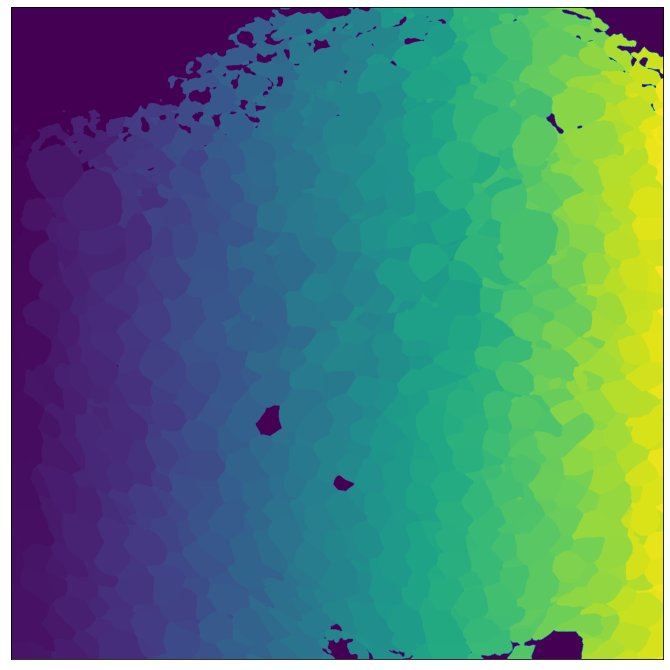

In [17]:
display_image_array(segmd_data[100])

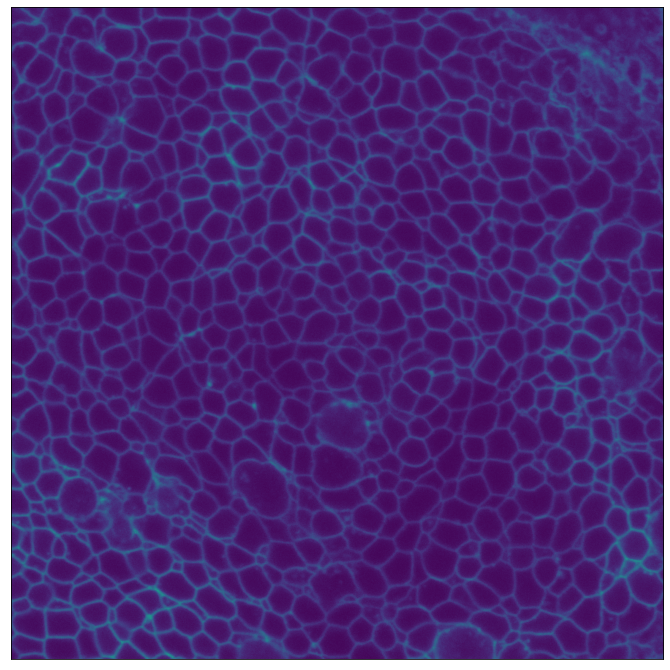

In [533]:
display_image_array(image_data[100])

In [14]:
def find_cell_boundaries(image):
    
    mask = np.ones_like(image)
    
    # center-left:
    diff = (image[1:-1, 1:-1] - image[0:-2, 1:-1]) == 0
    print(diff.shape)
    mask[1:-1, 1:-1] *= diff
    mask[0:-2, 1:-1] *= diff
    
    # lower-left:
    diff = (image[1:-1, 1:-1] - image[0:-2, 0:-2]) == 0
    
    mask[1:-1, 1:-1] *= diff
    mask[0:-2, 0:-2] *= diff
    
    # lower-center:
    diff = (image[1:-1, 1:-1] - image[1:-1, 0:-2]) == 0
    
    mask[1:-1, 1:-1] *= diff
    mask[1:-1, 0:-2] *= diff
    
    # lower-right:
    diff = (image[1:-1, 1:-1] - image[2:, 0:-2]) == 0
    
    mask[1:-1, 1:-1] *= diff
    mask[2:, 0:-2] *= diff
    
    mask = np.logical_not(mask)
    
    boundaries = mask * image
    
    return boundaries

(1546, 1546)


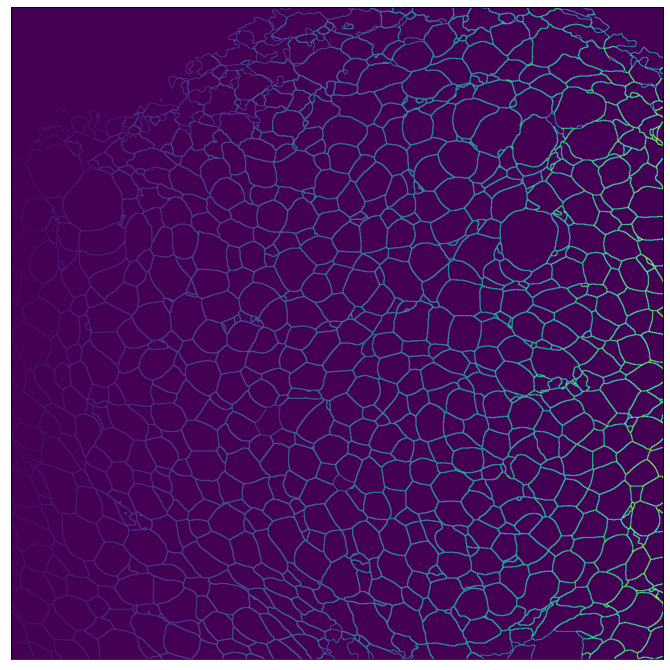

In [15]:
display_image_array(find_cell_boundaries(segmd_data[100]))

In [35]:
def find_cell_boundaries(image_stack):
    
    mask = np.ones_like(image_stack)
    
    # center-left:
    diff = (image_stack[:, 1:-1, 1:-1] - image_stack[:, 0:-2, 1:-1]) == 0
    
    mask[:, 1:-1, 1:-1] *= diff
    mask[:, 0:-2, 1:-1] *= diff
    '''
    # lower-left:
    diff = (image_stack[:, 1:-1, 1:-1] - image_stack[:, 0:-2, 0:-2]) == 0
    
    mask[:, 1:-1, 1:-1] *= diff
    mask[:, 0:-2, 0:-2] *= diff
    '''
    # lower-center:
    diff = (image_stack[:, 1:-1, 1:-1] - image_stack[:, 1:-1, 0:-2]) == 0
    
    mask[:, 1:-1, 1:-1] *= diff
    mask[:, 1:-1, 0:-2] *= diff
    '''
    # lower-right:
    diff = (image_stack[:, 1:-1, 1:-1] - image_stack[:, 2:, 0:-2]) == 0
    
    mask[:, 1:-1, 1:-1] *= diff
    mask[:, 2:, 0:-2] *= diff
    '''
    mask = np.logical_not(mask)
    
    boundaries = mask * image_stack
    
    return boundaries

In [36]:
boundary_data = find_cell_boundaries(segmd_data)
#boundary_data[boundary_data == 0] = -boundary_data.max()

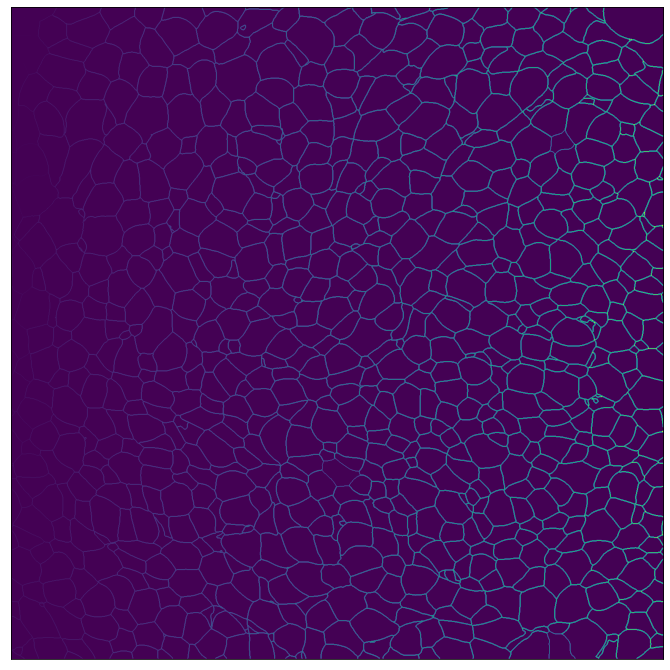

In [20]:
display_image_array(boundary_data[50])

In [21]:
def find_cell_vertices(stack):
    
    mask = np.zeros_like(stack)
    
    # center-left & lower-left:
    
    diff  = stack[:, 1:-1, 1:-1] != stack[:, 0:-2, 1:-1]
    diff &= stack[:, 0:-2, 1:-1] != stack[:, 0:-2, 0:-2]
    diff &= stack[:, 0:-2, 0:-2] != stack[:, 1:-1, 1:-1]
    
    mask[:, 1:-1, 1:-1] |= diff
    mask[:, 0:-2, 1:-1] |= diff
    mask[:, 0:-2, 0:-2] |= diff
    
    # lower-left & lower-center
    
    diff  = stack[:, 1:-1, 1:-1] != stack[:, 0:-2, 0:-2]
    diff &= stack[:, 0:-2, 0:-2] != stack[:, 1:-1, 0:-2]
    diff &= stack[:, 1:-1, 0:-2] != stack[:, 1:-1, 1:-1]
    
    mask[:, 1:-1, 1:-1] |= diff
    mask[:, 0:-2, 0:-2] |= diff
    mask[:, 1:-1, 0:-2] |= diff
    
    # lower-center & lower-right
    
    diff  = stack[:, 1:-1, 1:-1] != stack[:, 1:-1, 0:-2]
    diff &= stack[:, 1:-1, 0:-2] != stack[:, 2:  , 0:-2]
    diff &= stack[:, 2:  , 0:-2] != stack[:, 1:-1, 1:-1]
    
    mask[:, 1:-1, 1:-1] |= diff
    mask[:, 1:-1, 0:-2] |= diff
    mask[:, 2:  , 0:-2] |= diff
    
    vertex_stack = mask * stack
    
    return vertex_stack

In [22]:
vertex_data = find_cell_vertices(segmd_data)

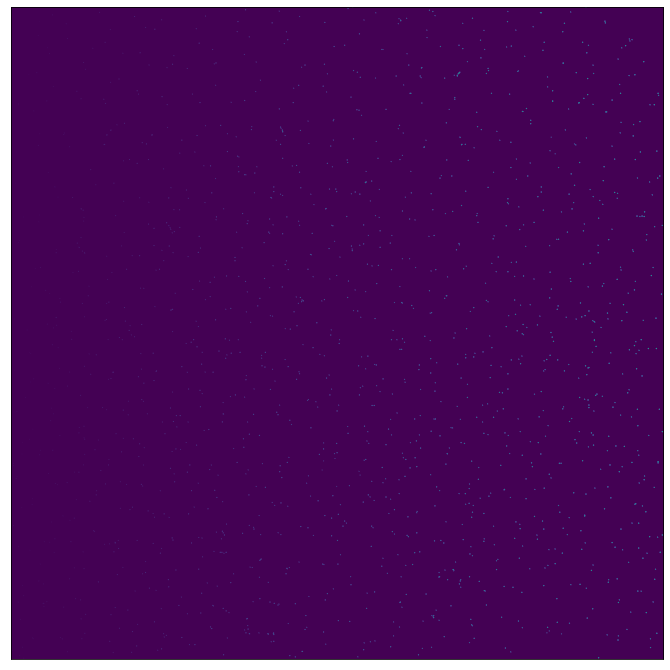

In [23]:
display_image_array(vertex_data[50])

In [24]:
def dilate_vertices(edge_stack, vertex_stack):
    
    mask = vertex_stack > 0
    
    dilated = mask.copy()
    
    dilated[:, 1:-1, 1:-1] |= mask[:, 0:-2, 1:-1]
    dilated[:, 1:-1, 1:-1] |= mask[:, 0:-2, 0:-2]
    dilated[:, 1:-1, 1:-1] |= mask[:, 1:-1, 0:-2]
    dilated[:, 1:-1, 1:-1] |= mask[:, 2:  , 0:-2]
    dilated[:, 1:-1, 1:-1] |= mask[:, 2:  , 1:-1]
    dilated[:, 1:-1, 1:-1] |= mask[:, 2:  , 2:  ]
    dilated[:, 1:-1, 1:-1] |= mask[:, 1:-1, 2:  ]
    dilated[:, 1:-1, 1:-1] |= mask[:, 0:-2, 2:  ]
    
    return dilated * edge_stack

In [1106]:
dilated_vertices = dilate_vertices(boundary_data, vertex_data)

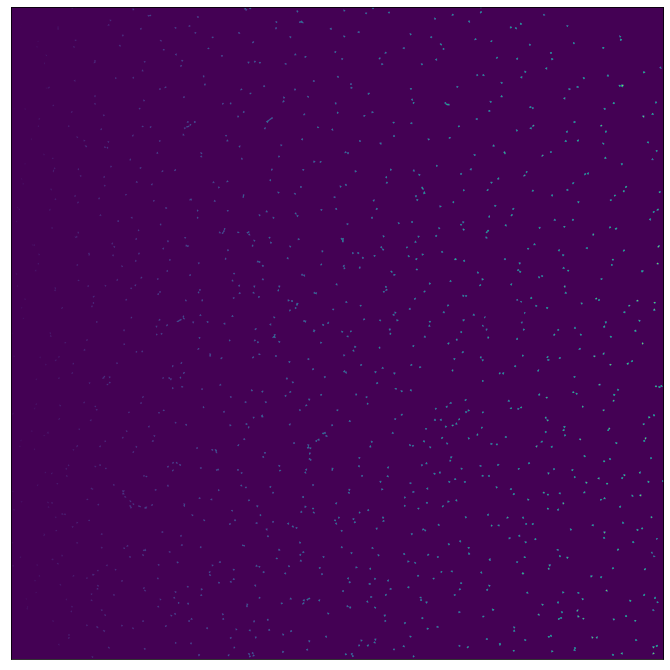

In [1107]:
display_image_array(dilated_vertices[50])

In [33]:
def display_RGB_array(image_array_1, image_array_2):
    
    image_array_1 = (image_array_1 > 0).astype(float)
    image_array_2 = (image_array_2 > 0).astype(float)
    image_array_3 = np.zeros_like(image_array_1)
    
    image_array = np.dstack((image_array_1, image_array_2, image_array_3))
    
    print(image_array.shape)
    
    fig = plt.figure(figsize = (12.0, 12.0))

    plt.imshow(image_array)#, cmap = cmap)

    plt.xticks([])
    plt.yticks([])

    plt.show()

(200, 200, 3)


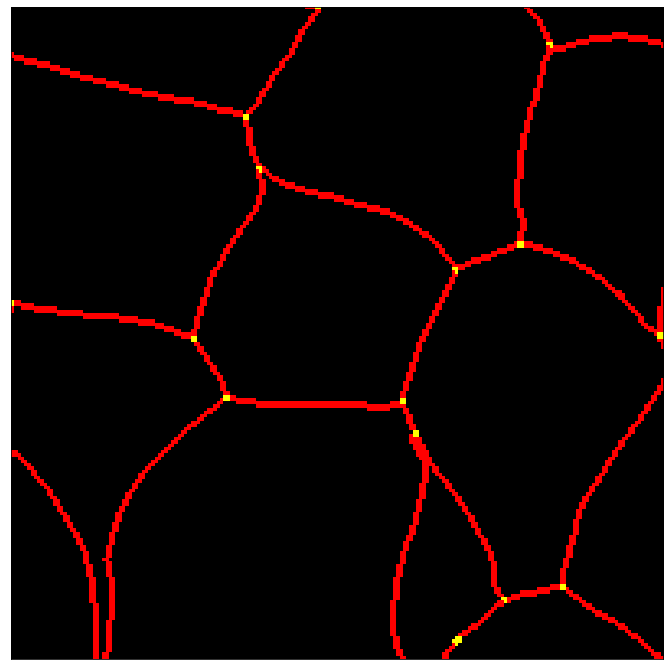

In [37]:
display_RGB_array(boundary_data[50,100:300,100:300], vertex_data[50,100:300,100:300])

In [38]:
display_RGB_array(boundary_data[50,100:300,100:300], dilated_vertices[50,100:300,100:300])

NameError: name 'dilated_vertices' is not defined

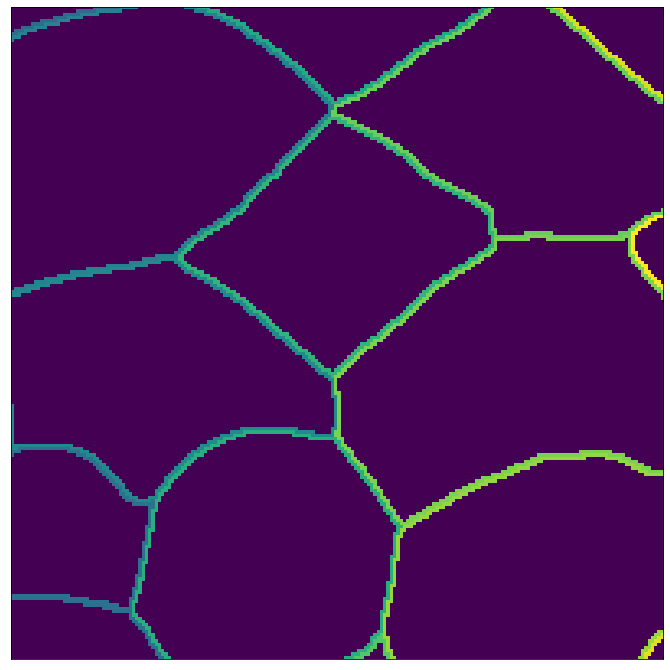

In [1091]:
display_image_array(boundary_data[50,100:300,100:300])

In [158]:
def get_points(boundary_data, segmented_data):
    
    points = {}
    
    for value in np.arange(1, 2):
        
        boundary_indices = np.argwhere(boundary_data == value)
        #print(boundary_indices.shape)
        slices = np.sort(np.unique(boundary_indices[:, 0]))
        
        for z in slices:
            
            z_indices = (boundary_indices[:, 0] == z)
            
            np.mean(boundary_indices[])
        
        #coords = map(np.nonzero, cell_boundary)
        #coords = np.array(np.nonzero(boundary_data == value))
        #print(coords.shape)
        #points[value] = np.mean(coords, axis = 0)
    
    #return points

In [159]:
get_points(boundary_data, segmd_data)

None


In [168]:
print(boundary_data.shape)

(209, 1548, 1548)


In [186]:
def find_cell_extents(boundary_data):
    
    cells = np.unique(boundary_data)
    
    indices = np.indices(boundary_data.shape)
    
    print(indices.shape)

    xmin, xmax = -1, boundary_data.shape[1]
    ymin, ymax = -1, boundary_data.shape[2]
    
    print(xmin, xmax)
    print(ymin, ymax)
    
    for cell in cells[:1]:
        
        cell_boundary = (boundary_data == cell)
        
        xindex_min = np.amin(indices[1], axis = (1, 2), 
                           initial = xmax, where = cell_boundary)
        yindex_min = np.amin(indices[2], axis = (1, 2), 
                           initial = ymax, where = cell_boundary)
        xindex_max = np.amax(indices[1], axis = (1, 2), 
                           initial = xmin, where = cell_boundary)
        yindex_max = np.amax(indices[2], axis = (1, 2), 
                           initial = ymin, where = cell_boundary)
        
        print(xindex_min.shape)
        '''
        xindex_min[xindex_min == xmax] = np.nan
        yindex_min[yindex_min == ymax] = np.nan
        xindex_max[xindex_max == xmin] = np.nan
        yindex_max[yindex_max == ymin] = np.nan
        
        extents = [xindex_min, yindex_min, xindex_max, yindex_max]
        '''
    return extents

In [187]:
find_cell_extents(boundary_data)

(3, 209, 1548, 1548)
-1 1548
-1 1548
(209,)


NameError: name 'extents' is not defined

In [188]:
cell_values = np.unique(boundary_data)

In [189]:
index_stack = np.indices(boundary_data.shape)

In [193]:
def find_cell_extents(boundary_stack):
    
    cell_rect = {}
    
    for value in cell_values[:1]:
        
        mask = (boundary_stack == value)
        
        cell_rect[cell] = []
        
        for z in range(boundary_stack.shape[0]):
            
            values = index_stack[1,z][mask[z]]
            
            xmax = index_stack[1,z][mask[z]].max()
            
            ymax = index_stack[2,z][mask[z]].max()
            
            xmin = index_stack[1,z][mask[z]].min()
            
            ymin = index_stack[2,z][mask[z]].min()
            
            rect = [[z, xmin, ymin], [z, xmax, ymin], [z, xmax, ymax], [z, xmin, ymax]]
            
            cell_rect[cell] += [rect]
        
    return cell_rect

In [194]:
find_cell_extents(boundary_data)

KeyboardInterrupt: 

In [198]:
np.indices((3,3))[1].flatten()

array([0, 1, 2, 0, 1, 2, 0, 1, 2])

In [339]:
def find_cell_boxes(boundary_stack):
    
    cell_boxes = {}
    
    zsize, xsize, ysize = boundary_stack.shape
    
    zindex = np.arange(zsize)
    
    for cell in cell_values:
        
        print(cell, end = ', ')
        
        mask = (boundary_stack == cell)
        
        any_x = mask.any(axis = 1)
        any_y = mask.any(axis = 2)
        
        #print(any_x.shape, any_y.shape)
        
        any_z = np.logical_and(any_x.any(axis = 1), any_y.any(axis = 1))
        
        #print(any_z)
        
        if any_z.any():
        
            xmin = any_x[any_z].argmax(axis = 1)
            ymin = any_y[any_z].argmax(axis = 1)
            xmax = xsize - np.flip(any_x[any_z], axis = 1).argmax(axis = 1)
            ymax = ysize - np.flip(any_y[any_z], axis = 1).argmax(axis = 1)

            #print(xmin, xmax)
            #print(ymin, ymax)

            corners = (
                np.c_[zindex[any_z], ymin, xmin],
                np.c_[zindex[any_z], ymin, xmax],
                np.c_[zindex[any_z], ymax, xmax],
                np.c_[zindex[any_z], ymax, xmin])

            boxes = np.transpose(corners, (1, 0, 2))

            #print(boxes.shape)
        
            cell_boxes[cell] = boxes
        
    return cell_boxes

In [331]:
cell_boxes = find_cell_boxes(boundary_data)

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 

1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 1560, 1561, 1562, 1563, 1564, 1565, 1566, 1567, 1568, 1569, 1570, 1571, 1572, 1573, 1574, 1575, 1576, 1577, 1578, 1579, 1580, 1581, 1582, 1583, 1584, 1585, 1586, 1587, 1588, 1589, 1590, 1591, 1592, 1593, 1594, 1595, 1596, 1597, 1598, 1599, 1600, 1601, 1602, 1603, 1604, 1605, 1606, 1607, 1608, 1609, 1610, 1611, 1612, 

In [335]:
cell_boxes[750].shape

(134, 4, 3)

In [336]:
example_boxes = cell_boxes[750][:,:,[0,2,1]]

In [337]:
example_boxes.shape

(134, 4, 3)

In [25]:
%gui qt5
import napari

from vispy.color.colormap import Colormap as colormap

from qtpy.QtCore import Qt
from qtpy.QtWidgets import QSlider
from qtpy.QtWidgets import QListView

from qtpy.QtGui import QStandardItem
from qtpy.QtGui import QStandardItemModel

In [40]:
viewer = napari.Viewer()
viewer.theme = 'light'

'''
cell_index = []

# Define a callback that will take the value of the slider and the viewer
# and do something, in this case we just set the status
def slider_callback(viewer, value):
    
    if cell_index:
    
        cell = cell_index[value]

        viewer.status = str(cell)
        
        for c in boxes:
            
            boxes[c].visible = False
        
        boxes[cell].visible = True
    
    else:
        
        viewer.status = '-'
    

# Make a horizontal slider from 0 - 100
slider = QSlider()
#slider = QSlider(Qt.Vertical)
#slider = QSlider(Qt.Horizontal)

slider.setMinimum(0)
slider.setMaximum(0)
slider.setSingleStep(1)

# Connect your slider to your callback function
slider.valueChanged[int].connect(
    lambda value = slider: slider_callback(viewer, value))

# Add your slider as a new dockwidget
# note that you could have created a much more complex QtWidget here
# with multiple widgets inside of it etc.
viewer.window.add_dock_widget(slider, name = 'my slider', area = 'left')
'''

items = QListView() #(Dialog)
#self.listView.setObjectName(_fromUtf8("listView"))

model = QStandardItemModel()
items.setModel(model)

viewer.window.add_dock_widget(items, name = 'items', area = 'left')
'''
for i in entries:
    item = QStandardItem(i)
    model.appendRow(item)
'''
cmin = segmd_data.min()
cmax = segmd_data.max()
cnum = cmax - cmin

cmap_controls = np.array((0.0, 0.05, 0.95, 1.0))

cmap_colors = np.zeros((3, 3))
cmap_colors[1,0] = 1.0
cmap = colormap(colors = cmap_colors, controls = cmap_controls, interpolation = 'zero')

cmap_colors = np.zeros((3, 3))
cmap_colors[(0,2),(0,0)] = 1.0
cinv = colormap(colors = cmap_colors, controls = cmap_controls, interpolation = 'zero')

cmap_colors = np.zeros((3, 3))
cmap_colors[(0,2,0,2),(0,0,1,1)] = 1.0
cyel = colormap(colors = cmap_colors, controls = cmap_controls, interpolation = 'zero')

#contrast = [749.0, 751.0]
#contrast = [cmin - cnum * 0.1, cmax + cnum * 0.1]
#contrast = [cmin, cmax]
contrast = [-0.5, 0.5]

text_pars = {
    'text': '750',
    'size': 12,
    'color': 'yellow',
    'anchor': 'upper_left',
    'translation': [-3, 0]}

box_pars = {
    'text': text_pars, 
    'shape_type': 'rectangle',
    'face_color': 'transparent',
    'edge_color': 'yellow',
    #'selected': False,
    'visible': False}

segmentation = viewer.add_image(segmd_data, colormap = 'Greys',
                                blending = 'opaque', 
                                visible = True)
image = viewer.add_image(image_data, blending = 'opaque',
                                visible = True)
boundaries = viewer.add_image(boundary_data, colormap = cinv, 
                                contrast_limits = contrast,
                                blending = 'additive', 
                                visible = True, metadata = {})
'''
vertices = viewer.add_image(vertex_data, colormap = cyel, 
                                contrast_limits = contrast,
                                blending = 'additive', 
                                visible = True, metadata = {})
'''
boxes = {}

image.selected = False
boundaries.selected = False
segmentation.selected = True

#viewer.window.qt_viewer.dockLayerList.setVisible(False)
#viewer.window.qt_viewer.dockLayerControls.setVisible(False)

boundaries.metadata['row'] = 0
boundaries.metadata['items'] = []

boundaries.metadata['cells'] = set()
boundaries.metadata['split_cell'] = set()
boundaries.metadata['split_cells'] = set()#[set()]

def add_box(cell):
    
    box = viewer.add_shapes(cell_boxes[cell], **box_pars)
        
    box.selected = False
    segmentation.selected = True
        
    boxes[cell] = box
    cell_index.append(cell)
    
    slider.setMaximum(len(cell_index) - 1)

@viewer.bind_key('Space')
def select_boundary(viewer):
    
    if segmentation.visible:
        
        value = segmentation.get_value()
        
        boundaries.colormap = cmap
        boundaries.contrast_limits = [value - 0.5, value + 0.5]
        segmentation.visible = False
    
    else:
        
        boundaries.colormap = cinv
        boundaries.contrast_limits = [-0.5, 0.5]
        segmentation.visible = True

@viewer.bind_key('b')
def toggle_boundaries(viewer):
    
    boundaries.visible = not boundaries.visible
'''
@viewer.bind_key('f')
def toggle_boxes(viewer):
    
    vis = [boxes[cell].visible for cell in boxes]
    
    if any(vis):
    
        for cell in boxes:
            boxes[cell].visible = False
    
    else:
        
        for cell in boxes:
            boxes[cell].visible = True
    '''
@viewer.bind_key('v')
def store_value(viewer):
    
    if not segmentation.visible:
    
        cell = int(np.mean(boundaries.contrast_limits))
        
        boundaries.metadata['row'] += 1
        
        item_string = 'Single Cell: ' + str(cell)
        
        item = QStandardItem(item_string)
        
        boundaries.metadata['items'].append(item)
        
        model.appendRow(item)

        print(item_string)

        boundaries.metadata['cells'].add(cell)
        
        #add_box(cell)

@viewer.bind_key('n')
def remove_value(viewer):
    
    if not segmentation.visible:
    
        cell = int(np.mean(boundaries.contrast_limits))

        #print(cell)

        boundaries.metadata['cells'].discard(value)
        
        #del boxes[cell]

@viewer.bind_key('a')
def add_split_cell(viewer):
    
    if not segmentation.visible:
    
        cell = int(np.mean(boundaries.contrast_limits))
        
        if boundaries.metadata['split_cell']:
            
            item = boundaries.metadata['items'][-1]
            
            item_string = item.text()
            
            item_string += ', ' + str(cell)
            
            item.setText(item_string)
            
            print(', ' + str(cell), end = '')
            
        else:
            
            item_string = 'Split Cell: {' + str(cell)
            
            item = QStandardItem(item_string)
            
            boundaries.metadata['items'].append(item)

            boundaries.metadata['row'] += 1
            
            model.appendRow(item)
        
            print(item_string, end = '')
        
        #boundaries.metadata['split_cells'][-1].append(cell)
        
        boundaries.metadata['split_cell'].add(cell)
        
@viewer.bind_key('s')
def store_split_cell(viewer):
    
    cell = frozenset(boundaries.metadata['split_cell'])
    
    #print(frozen_split_cell)
    
    item = boundaries.metadata['items'][-1]
    
    item_string = item.text()
    
    item_string += '}'
            
    item.setText(item_string)
    
    print('}')
    
    boundaries.metadata['split_cells'].add(cell)
    
    boundaries.metadata['split_cell'].clear()
        
@viewer.bind_key('Backspace')
def close(viewer):
    
    print(boundaries.metadata['cells'])
    print(boundaries.metadata['split_cells'])
    
    viewer.close()

In [1033]:
boundaries.metadata['split_cells']

set()

In [1034]:
split_cell_set = split_cell_set | boundaries.metadata['split_cells']

In [1035]:
print(len(split_cell_set))
split_cell_set

6


{frozenset({491, 550}),
 frozenset({330, 357}),
 frozenset({407, 436}),
 frozenset({710, 753}),
 frozenset({462, 463}),
 frozenset({874, 892})}

In [1036]:
save_split_cells(split_cell_set)

In [1037]:
boundaries.metadata['cells']

{457, 465, 592, 620, 647}

In [1038]:
good_cell_set = good_cell_set | boundaries.metadata['cells']

In [1039]:
print(len(good_cell_set))
good_cell_set

32


{227,
 252,
 279,
 291,
 320,
 322,
 332,
 370,
 376,
 391,
 401,
 432,
 437,
 457,
 460,
 465,
 486,
 490,
 542,
 571,
 592,
 617,
 620,
 647,
 668,
 690,
 767,
 786,
 804,
 821,
 852,
 887}

In [1040]:
save_good_cells(good_cell_set)

In [540]:
def save_good_cells(cells):
    
    file_name = image_file.rstrip('.tif') + '_GOOD-CELLS.txt'
    file_path = source_folder + file_name
    
    cell_array = np.array(sorted([cell for cell in cells]))
    
    np.savetxt(file_path, cell_array, fmt = '%d')

In [541]:
def save_split_cells(split_cells):
    
    file_name = image_file.rstrip('.tif') + '_SPLIT-CELLS.txt'
    file_path = source_folder + file_name
    
    with open(file_path, 'w') as file:
        
        for split_cell in split_cells:
            
            for cell in split_cell:
        
                file.write(str(cell))
                file.write(' ')
            
            file.write('\n')

In [53]:
def pick_cells(image_array):

    n, indices = np.unique(image_array, return_inverse = True)
    
    print(n.size)
    print(indices.shape)

In [54]:
pick_cells(image_data)

1612
(500827536,)


In [157]:
from scipy.spatial import ConvexHull as convex_hull

def find_cell_border_pixels(image_array, cell_number):
    
    adj = (lambda i: np.meshgrid(i, i))(np.arange(-1, 2))
    adj = np.array(adj).transpose((1, 2, 0))
    
    tri = np.concatenate(adj)[[0, 1, 2, 3, 5, 6, 7, 8]]
    print(tri.shape)
    def find_border_coords(cell_number):
    
        indices = np.nonzero(image_array == cell_number)

        coords = np.column_stack(indices)

        return coords[convex_hull(coords).vertices]
    
    def get_coord_values(coords):
        
        ndims = len(coords.shape)
        
        coord_tuple = tuple(np.moveaxis(coords, -1, 0))
        
        return image_array[coord_tuple]
    
    def get_corner_coord_triplet(corner_coords):
        
        for triple_index in tri:
            corner_coords[[0, 0]], corner_coords[triple_index]
        
        print(triplets)
        
    print(adj == [0,0])
    
    border_coords = find_border_coords(cell_number)
    print(border_coords.shape)
    
    adj_coords = []
    for border_coord in border_coords:
        
        adj_coord = adj + border_coord
        
        adj_coords += [adj_coord]
        
        adj_values = np.unique(get_coord_values(adj_coord))
        if adj_values.size == 3:
            get_corner_coord_triplet(adj_coord)
            #cor_coords += [adj_coord]
        if adj_values.size >= 4:
            print('More than 3 values in patch.')
    
    adj_coords = np.concatenate(np.array(adj_coords), 0)
    #print(adj_coords.shape)
    adj_coords = np.unique(adj_coords, axis = 0)
    #print(adj_coords.shape)
    
    adj_cell_numbers = np.unique(image_array[tuple(adj_coords.T)])
    
    adj_border_cells_coords = []
    
    for adj_cell_number in adj_cell_numbers:
        
        if not adj_cell_number == cell_number:
    
            adj_border_cells_coords += [find_border_coords(adj_cell_number)]
    
    fig = plt.figure(figsize = (12.0, 12.0))
    
    plt.imshow(image_array)
    plt.plot(*np.flip(border_coords, 1).T, c = 'k', lw = 0.7)
    for adj_border_cell_coords in adj_border_cells_coords:
        plt.plot(*np.flip(adj_border_cell_coords, 1).T, 
                 c = 'r', lw = 0.7)
    
    for adj_border_cell_coords in adj_border_cells_coords:
        plt.plot(*np.flip(adj_border_cell_coords, 1).T, 
                 c = 'r', lw = 0.7)

    plt.xticks([])
    plt.yticks([])

    plt.show()

In [158]:
find_cell_border_pixels(image_data[100], 793)

(8, 2)
[[[False False]
  [ True False]
  [False False]]

 [[False  True]
  [ True  True]
  [False  True]]

 [[False False]
  [ True False]
  [False False]]]
(28, 2)


NameError: name 'triplets' is not defined

In [349]:
def find_neighbouring_cells(image_array, cell_number):
    
    adj = (lambda i: np.meshgrid(i, i))(np.arange(-1, 2))
    adj = np.array(adj)#.transpose((1, 2, 0))
    
    def find_cell_indices(cell_number):
        
        return np.nonzero(image_array == cell_number)
    
    def get_indices_values(indices):
        
        return image_array[tuple(indices)]
    
    cell_indices = find_cell_indices(cell_number)
    
    adj_indices = np.expand_dims(cell_indices, (2, 3)) + np.expand_dims(adj, 1)
    adj_values = get_indices_values(adj_indices)
    adj_cells = (lambda c: c[c != cell_number])(np.unique(adj_values))
    adj_cell_indices = [find_cell_indices(cell) for cell in adj_cells]
    
    extent = (lambda a: (a.min(1), a.max(1)))(np.concatenate(adj_cell_indices, 1))
    size = np.squeeze(np.diff(np.transpose(extent), 1)) + 1
    sub_array = np.zeros(size, dtype = int) - 1
    print(sub_array)
    print(adj_cells)
    print(extent)
    print(size)
    
    def set_sub(i, n): 
        
        sub_array[tuple(np.array(i) - np.expand_dims(extent[0],1))] = n
    
    for n, (indices, val) in enumerate(zip(adj_cell_indices, adj_cells)):
        
        #sub_array[tuple(np.array(indices) - np.expand_dims(extent[0],1))] = val
        #sub_array[tuple(np.array(indices) - np.expand_dims(extent[0],1))] = n
        #print(n)
        set_sub(indices, n)
        
    set_sub(cell_indices, adj_cells.size)
    print(np.unique(sub_array).size)
    
    def pastel(h, s = 0.6, v = 1.0):
        
        return clr.hsv_to_rgb(np.column_stack((h, np.full_like(h, s), np.full_like(h, v))))
    
    colors = np.linspace(0, 1, adj_cells.size + 1)[:-1]
    
    rng = np.random.default_rng()
    rng.shuffle(colors)
    
    colors = pastel(colors)
    
    cmap = clr.ListedColormap(colors)
    cmap.set_over(pastel(0.0, 0.0, 0.9)[0])
    cmap.set_under(pastel(0.0, 0.0, 0.8)[0])
    
    norm = clr.BoundaryNorm(np.arange(0, cmap.N + 1), cmap.N)
    #norm = clr.Normalize(vmin = 0, vmax = adj_cells.size)
    
    fig = plt.figure(figsize = (12.0, 12.0))
    
    plt.imshow(sub_array, cmap = cmap, norm = norm)

    plt.xticks([])
    plt.yticks([])

    plt.show()

[[-1 -1 -1 ... -1 -1 -1]
 [-1 -1 -1 ... -1 -1 -1]
 [-1 -1 -1 ... -1 -1 -1]
 ...
 [-1 -1 -1 ... -1 -1 -1]
 [-1 -1 -1 ... -1 -1 -1]
 [-1 -1 -1 ... -1 -1 -1]]
[717 723 750 794 866 901]
(array([699, 810]), array([895, 999]))
[197 190]
8


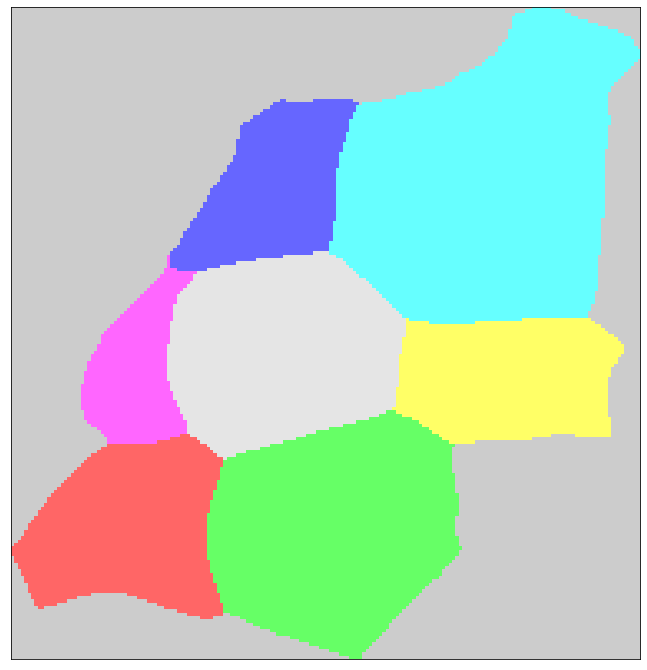

In [350]:
find_neighbouring_cells(image_data[100], 793)

In [94]:
def solve_least_sq(X, Y):
    
    A = X[np.newaxis] ** np.arange(7)[:, np.newaxis]
    B = np.sum(Y[np.newaxis] * A[:4], 1)
    
    N = (lambda n: n[np.newaxis] + n[:, np.newaxis])(np.arange(4))
    A = np.sum(A, 1)[N]
    
    #print(A)
    #print(B)
    
    return np.linalg.solve(A, B)

In [95]:
solve_least_sq(np.array([2, 3]), np.array([2, 3]))

array([-0.046875  ,  1.05078125, -0.01757812,  0.00195312])

In [169]:
from sklearn import svm

def find_cell_boundaries(image_array, cell_number):
    
    adj = (lambda i: np.meshgrid(i, i))(np.arange(-1, 2))
    adj = np.array(adj)#.transpose((1, 2, 0))
    
    def find_cell_indices(cell_number):
        
        return np.nonzero(image_array == cell_number)
    
    def get_indices_values(indices):
        
        return image_array[tuple(indices)]
    
    def find_unique_cells(values):
        
        cells = np.unique(adj_values)
        index = (cells != cell_number)
        
        return np.insert(cells[index.nonzero()], 0, cell_number)
    
    cell_indices = find_cell_indices(cell_number)
    
    adj_indices = np.expand_dims(cell_indices, (2, 3)) + np.expand_dims(adj, 1)
    adj_values = get_indices_values(adj_indices)
    
    cells = find_unique_cells(adj_values)
    cells = cells[[0, 2]]
    
    cell_indices = [find_cell_indices(cell) for cell in cells]
    cell_values = [get_indices_values(indices) for indices in cell_indices]
    
    border_adj_indices = {}
    border_org_indices = {}
    
    for vals, inds in zip(adj_values, np.array(adj_indices).transpose((1, 2, 3, 0))):
        
        unique_vals = np.unique(vals)
        
        if unique_vals.size > 1:
            
            for val in unique_vals:
                
                if val != cell_number:
                    
                    if not val in border_adj_indices: border_adj_indices[val] = []
                    if not val in border_org_indices: border_org_indices[val] = []
                    
                    border_adj_indices[val].append(inds[vals == val])
                    
                    border_org_indices[val].append(inds[1, 1])
    
    for val in border_adj_indices:
        #print(val)
        #print(border_adj_indices[val])
        #print(border_org_indices[val])
        
        border_adj_indices[val] = np.unique(np.concatenate(border_adj_indices[val]), axis = 0).transpose()
        border_org_indices[val] = np.unique(np.array(border_org_indices[val]), axis = 0).transpose()
    
        
        #print(border_adj_indices[val])
        #print(border_org_indices[val])
        
    '''
    #adj_indices_values = [np.unique(a) for a in adj_values]
    #org_indices_indices = [np.full(a.size, ) for a in adj_indices_values]
    
    border_indices_indices = np.array([a.size for a in border_adj_cells]) > 1
    
    border_cells_aggrega
    border_org_cells = [border_org_indices for cell in cells[1:]]
    
    org_i = np.array(np.logical_and(*(adj == 0)))
    adj_i = np.logical_not(org_i)
    print(adj_i)
    print(org_i)
    
    border_adj_indices = np.reshape(adj_indices[:, border_indices_indices][:, :, adj_i], (2, -1)).transpose()
    border_org_indices = np.reshape(np.repeat(adj_indices[:, border_indices_indices][:, :, org_i], 8, -1), (2, -1)).transpose()
    print(border_adj_indices.shape)
    print(border_org_indices.shape)
    
    border_adj_indices, lookup = np.unique(border_adj_indices, return_index = True, axis = 0)
    
    border_
    
    border_adj_indices = border_adj_indices.transpose()
    border_org_indices = border_org_indices[lookup].transpose()
    print(border_adj_indices.shape)
    
    border_adj_cells = get_indices_values(border_adj_indices)
    
    cell_border_adj_indices = [border_adj_indices[:, border_adj_cells == cell] for cell in cells[1:]]
    cell_border_org_indices = [border_org_indices[:, border_adj_cells == cell] for cell in cells[1:]]
    
    print([i.shape for i in cell_border_adj_indices])
    
    #border_indices = np.unique(adj_indices[:, border_indices_indices].reshape((2, -1)), axis = 1)
    #border_cells = get_indices_values(border_indices)
    
    #border_cell_indices  = [adj_indices[:, border_indices_indices, 1, 1]]
    #border_cell_indices += [border_indices[:, border_cells == cell] for cell in cells[1:]]
    '''
    extent = (lambda a: (a.min(1), a.max(1)))(np.concatenate(cell_indices, 1))
    size = np.squeeze(np.diff(np.transpose(extent), 1)) + 1
    extents = np.flip(np.array(extent).transpose(), 0).flatten()
    print(extent)
    print(extents)
    sub_array = np.zeros(size, dtype = int) - 1
    
    def set_sub(i, n):
        
        sub_array[tuple(np.array(i) - np.expand_dims(extent[0], 1))] = n
    ''' 
    for n, (indices, val) in enumerate(zip(cell_indices, cells)):
        
        set_sub(indices, n)
    '''
    for index, cell in enumerate(cells[1:]):
        #print(border_adj_indices[cell].shape)
        #print(border_org_indices[cell].shape)
        set_sub(border_adj_indices[cell], index + 1)
        set_sub(border_org_indices[cell], 0)
    
    border_indices_0 = border_adj_indices[cell].transpose()
    border_indices_1 = border_org_indices[cell].transpose()
    '''
    X = np.concatenate((border_indices_0, border_indices_1))
    y = np.concatenate((np.zeros_like(border_indices_0[:,0]), np.ones_like(border_indices_1[:,0])))
    
    print(X.shape)
    print(y.shape)
    
    model = svm.SVC(kernel = 'poly', degree = 3, gamma = 'auto', C = 1.0).fit(X, y)
    
    print(model.get_params())
    '''
    
    X, Y = np.concatenate((border_indices_0, border_indices_1)).transpose()
    print(X.min(), X.max())
    print(X.shape)
    print(Y.shape)
    
    pars = solve_least_sq(X, Y)
    print(pars)
    
    X = np.linspace(extent[0][0], extent[1][0], 100)
    print(X)
    Y = np.sum((X[np.newaxis] ** np.arange(4)[:, np.newaxis]) * pars[:, np.newaxis], 0)
    print(Y.min(), Y.max())
    def pastel(h, s = 0.6, v = 1.0):
        
        return clr.hsv_to_rgb(np.column_stack((h, np.full_like(h, s), np.full_like(h, v))))
    
    colors = np.linspace(0, 1, cells.size + 1)[:-1]
    
    rng = np.random.default_rng()
    rng.shuffle(colors)
    
    colors = pastel(colors)
    
    cmap = clr.ListedColormap(colors)
    cmap.set_over(pastel(0.0, 0.0, 0.9)[0])
    cmap.set_under(pastel(0.0, 0.0, 0.8)[0])
    
    norm = clr.BoundaryNorm(np.arange(0, cmap.N + 1), cmap.N)
    
    fig = plt.figure(figsize = (12.0, 12.0))
    
    plt.imshow(sub_array, cmap = cmap, norm = norm, extent = extents)
    
    plt.plot(Y, X, c = 'k')

    #plt.xticks([])
    #plt.yticks([])
    
    fig.gca().set_aspect(1)

    plt.show()

(array([773, 831]), array([835, 928]))
[831 928 773 835]
779 827
(128,)
(128,)
[ 9.59887761e+03 -2.17514688e+01  1.35296065e-02  1.12479630e-15]
[773.         773.62626263 774.25252525 774.87878788 775.50505051
 776.13131313 776.75757576 777.38383838 778.01010101 778.63636364
 779.26262626 779.88888889 780.51515152 781.14141414 781.76767677
 782.39393939 783.02020202 783.64646465 784.27272727 784.8989899
 785.52525253 786.15151515 786.77777778 787.4040404  788.03030303
 788.65656566 789.28282828 789.90909091 790.53535354 791.16161616
 791.78787879 792.41414141 793.04040404 793.66666667 794.29292929
 794.91919192 795.54545455 796.17171717 796.7979798  797.42424242
 798.05050505 798.67676768 799.3030303  799.92929293 800.55555556
 801.18181818 801.80808081 802.43434343 803.06060606 803.68686869
 804.31313131 804.93939394 805.56565657 806.19191919 806.81818182
 807.44444444 808.07070707 808.6969697  809.32323232 809.94949495
 810.57575758 811.2020202  811.82828283 812.45454545 813.0808080

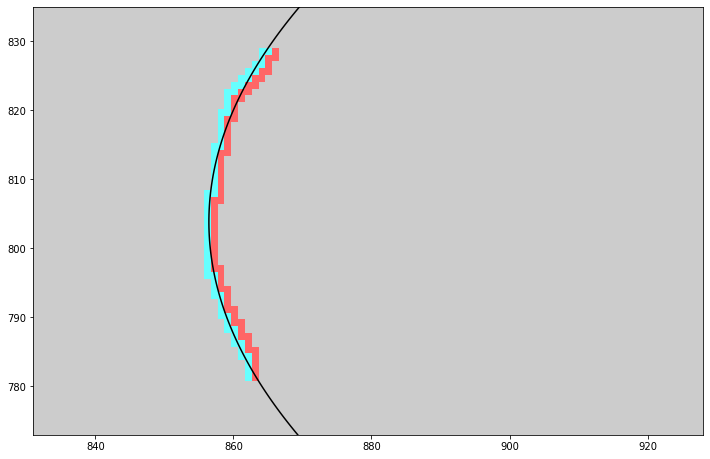

In [170]:
find_cell_boundaries(image_data[100], 793)